# classification example

## problem statement
- predict if a passenger will survive provided the given information like name, address, gender etc.

### import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### exploratory data analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [4]:
# delete name and host.dest as they carry no information about the person's survival
df.drop(['name', 'home.dest'], axis=1, inplace=True)

### deal with NA values

- delete the entire row containing the NA value(s)
- delete the entire column containing the NA value(s)
- impute the NA values
  - replace the NA values with **mean** if the data is of numeric type
  - replace the NA values with **mode** if the data is of textual type

In [7]:
# based on number of values misisng, columns like cabin, boat and body can be safely removed
df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)

In [8]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

### numeric conversion

- the procedure is called as encoding
- there are multiple encoders avaiable for encoding the non-numeric values
  - LabelEncoder
  - OneHotEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
encoder_sex = LabelEncoder()

# fit the values of sex column
encoder_sex.fit(df['sex'])

# convert the non-numeric values to numeric ones
df['sex'] = encoder_sex.fit_transform(df['sex'])

In [24]:
# check which one is 0 and which one is 1 
encoder_sex.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [19]:
# create a label encoder for ticket
encoder_ticket = LabelEncoder()

# fit the values
encoder_ticket.fit(df['ticket'])

# transform the values
df['ticket'] = encoder_ticket.fit_transform(df['ticket'])

In [22]:
# create a label encoder for embarked
encoder_embarked = LabelEncoder()

# fit the values
encoder_embarked.fit(df['embarked'])

# transform the values
df['embarked'] = encoder_embarked.fit_transform(df['embarked'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1309 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 92.2 KB


### replace the NA values

In [28]:
# replace the NA values in age with the mean value of age column
df['age'] = df['age'].fillna(df['age'].mean())

In [29]:
# replace the NA values in fare with the mean value of fare column
df['fare'] = df['fare'].fillna(df['fare'].mean())

### check the correlation analysis

In [30]:
df.corr()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
pclass,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,0.309695,-0.558477,0.182154
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,-0.125869,0.244208,-0.172526
sex,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,0.024725,-0.185484,0.095215
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,-0.085080,0.171521,-0.068091
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.063921,0.160224,0.064519
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.053389,0.221522,0.043835
ticket,0.309695,-0.125869,0.024725,-0.085080,0.063921,0.053389,1.000000,-0.014735,0.028539
fare,-0.558477,0.244208,-0.185484,0.171521,0.160224,0.221522,-0.014735,1.000000,-0.235729
embarked,0.182154,-0.172526,0.095215,-0.068091,0.064519,0.043835,0.028539,-0.235729,1.000000


In [31]:
# based on the correlatio analysis following columns are not required
# age (-0.05), sibsp (-0.02), parch (0.08)
df.drop(['age', 'sibsp', 'parch'], axis=1, inplace=True)

In [32]:
df.head()

,pclass,survived,sex,ticket,fare,embarked
0,1,1,0,187,211.3375,2
1,1,1,1,49,151.5500,2
2,1,0,0,49,151.5500,2
3,1,0,1,49,151.5500,2
4,1,0,0,49,151.5500,2


### split the data

In [33]:
# remove the dependent columnd to get all independent columns
x = df.drop('survived', axis=1)

# get the dependent column
y = df['survived']

In [46]:
from sklearn.model_selection import train_test_split

# split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=145)

### build the model

In [47]:
from sklearn.linear_model import LogisticRegressionCV

# create a model
# the parameters accepted by the model are known as hyper-parameters
# these parameters are used to optimize the model
model = LogisticRegressionCV(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV(max_iter=1000)

### model evaluation

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"cm = {cm}")
print(f"accuracy: {accuracy:0.2f}, precision: {precision:0.2f}, recall: {recall:0.2f}, f1: {f1:0.2f}")

cm = [[218  25]
 [ 50 100]]
accuracy: 0.81, precision: 0.80, recall: 0.67, f1: 0.73


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       243
           1       0.80      0.67      0.73       150

    accuracy                           0.81       393
   macro avg       0.81      0.78      0.79       393
weighted avg       0.81      0.81      0.81       393



### check if the model is overfitted

- an overfitted model has good training accuracy but low testing accuracy
  - to avoid overfitting the model, there are following options
    - use regularization technique (Ridge, Lasso, Elastic Net regression): for machine learning
    - use Dropout layer: deep learning
- an underfitted model has low training and testing accuracy
  - to avoid the underfitting
    - optimize the model using hyper parameters
    - change the ML algorithm
    - change the data or fix the data issues
- a normally fitted model has considerable training and test accuracy

In [50]:
# get the prediction for training dataset
y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print(f"training accuracy: {accuracy_train:0.2f}, testing accuracy: {accuracy:0.2f}")

training accuracy: 0.79, testing accuracy: 0.81


#### since the training and testing accuracy values are very closed and considerably good, the model is NOT overfitted

### result visualization

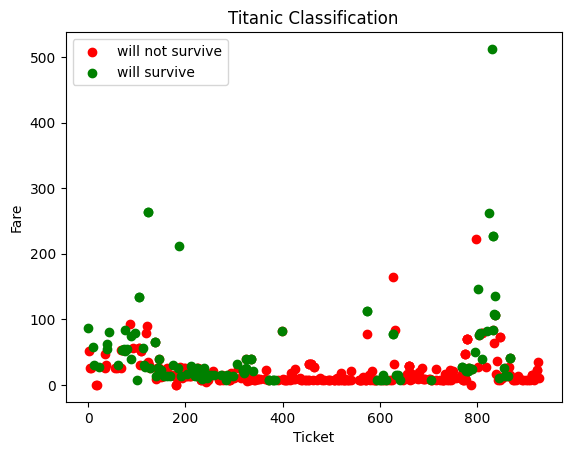

In [45]:
plt.scatter(x_test['ticket'][y_pred == 0], x_test['fare'][y_pred == 0], color="red", label="will not survive")
plt.scatter(x_test['ticket'][y_pred == 1], x_test['fare'][y_pred == 1], color="green", label="will survive")
plt.xlabel("Ticket")
plt.ylabel("Fare")
plt.title("Titanic Classification")
plt.legend()